In [2]:
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as json

In [5]:
import yfinance

Time Series Analysis of DAX . Problem Type : Forecasting Actionable Decision : Whether to Invest or Not in the Stock

In [6]:
stock_index = yfinance.Ticker("DAX")

print(stock_index.info)
print(json.dumps(stock_index.info, indent=4))
print(stock_index.info['regularMarketPrice'])
#print(f'{stock_index.info["regularMarketPrice"]} {stock_index.info["currency"]}')

history_short = stock_index.history(period='1d', interval='1m')['Close'][-360:-1]
history_med = stock_index.history(period='3d', interval='1m')['Close'][-960:-1]
history_long = stock_index.history(period='5d', interval='1m')['Close'][-2400:-1]

{'symbol': 'DAX', 'twoHundredDayAverageChangePercent': 0.1732796, 'dividendDate': 1482796800, 'trailingThreeMonthNavReturns': 14.64844, 'netAssets': 54264668.0, 'fiftyTwoWeekLowChangePercent': 0.4649364, 'language': 'en-US', 'regularMarketDayRange': '29.26 - 29.4599', 'regularMarketDayHigh': 29.4599, 'twoHundredDayAverageChange': 4.33465, 'askSize': 14, 'twoHundredDayAverage': 25.01535, 'fiftyTwoWeekHighChange': -0.1099987, 'fiftyTwoWeekRange': '20.035 - 29.46', 'fiftyDayAverageChange': 0.9923401, 'averageDailyVolume3Month': 18777, 'exchangeDataDelayedBy': 0, 'firstTradeDateMilliseconds': 1414071000000, 'fiftyTwoWeekLow': 20.035, 'regularMarketVolume': 13070, 'market': 'us_market', 'postMarketPrice': 29.42, 'quoteSourceName': 'Nasdaq Real Time Price', 'messageBoardId': 'finmb_271593092', 'priceHint': 2, 'ytdReturn': 14.64844, 'regularMarketDayLow': 29.26, 'exchange': 'NGM', 'sourceInterval': 15, 'region': 'US', 'shortName': 'Global X DAX Germany ETF', 'fiftyDayAverageChangePercent': 0.

In [7]:
history_short

Datetime
2023-03-31 09:30:00-04:00    29.330000
2023-03-31 09:47:00-04:00    29.440001
2023-03-31 09:57:00-04:00    29.370001
2023-03-31 10:03:00-04:00    29.370001
2023-03-31 10:11:00-04:00    29.320000
2023-03-31 10:12:00-04:00    29.340000
2023-03-31 10:22:00-04:00    29.340000
2023-03-31 10:45:00-04:00    29.340000
2023-03-31 10:53:00-04:00    29.455000
2023-03-31 10:54:00-04:00    29.441999
2023-03-31 11:23:00-04:00    29.291000
2023-03-31 11:50:00-04:00    29.459900
2023-03-31 11:54:00-04:00    29.447599
2023-03-31 12:13:00-04:00    29.379999
2023-03-31 13:23:00-04:00    29.296499
2023-03-31 13:29:00-04:00    29.325001
2023-03-31 13:30:00-04:00    29.330000
2023-03-31 13:49:00-04:00    29.260000
2023-03-31 13:54:00-04:00    29.286699
2023-03-31 13:55:00-04:00    29.270000
2023-03-31 14:46:00-04:00    29.320000
Name: Close, dtype: float64

In [26]:
DAX_complete = yfinance.download("DAX", start='2023-01-01', end='2023-03-31')

[*********************100%***********************]  1 of 1 completed


Data Describtion:

Date      -> Date of trading
Open      -> Price at which security first trades
High      -> Highest Price of the trading day
Low       -> Lowest Price of the trading day
Close     -> Last Price the stock traded during the trading day
Adj Close -> Price that is adjusts Coroporate Actions on Closing Price
Volume    -> Number of Shares that changed hands during the trading day

In [27]:
DAX_complete

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,25.959999,26.100000,25.820000,25.820000,25.820000,30100
2023-01-04,26.459999,26.635000,26.379999,26.629999,26.629999,19200
2023-01-05,26.330000,26.389999,26.260000,26.299999,26.299999,38700
2023-01-06,26.299999,27.000000,26.299999,26.969999,26.969999,16700
2023-01-09,27.340000,27.559999,27.280001,27.360001,27.360001,21900
...,...,...,...,...,...,...
2023-03-24,27.700001,27.920000,27.590000,27.920000,27.920000,9300
2023-03-27,28.200001,28.370001,28.160000,28.170000,28.170000,16800
2023-03-28,28.260000,28.410000,28.260000,28.370001,28.370001,18100


In [28]:
DAX_complete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2023-01-03 to 2023-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       61 non-null     float64
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Close      61 non-null     float64
 4   Adj Close  61 non-null     float64
 5   Volume     61 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3 KB


# Data Preprocessing

In [29]:
data = DAX_complete.copy()

## Data Types

In [30]:
data['Date'] = data.index

In [31]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [32]:
data['Date']

Date
2023-01-03   2023-01-03
2023-01-04   2023-01-04
2023-01-05   2023-01-05
2023-01-06   2023-01-06
2023-01-09   2023-01-09
                ...    
2023-03-24   2023-03-24
2023-03-27   2023-03-27
2023-03-28   2023-03-28
2023-03-29   2023-03-29
2023-03-30   2023-03-30
Name: Date, Length: 61, dtype: datetime64[ns]

In [33]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2023-01-03,25.959999,26.100000,25.820000,25.820000,25.820000,30100,2023-01-03
2023-01-04,26.459999,26.635000,26.379999,26.629999,26.629999,19200,2023-01-04
2023-01-05,26.330000,26.389999,26.260000,26.299999,26.299999,38700,2023-01-05
2023-01-06,26.299999,27.000000,26.299999,26.969999,26.969999,16700,2023-01-06
2023-01-09,27.340000,27.559999,27.280001,27.360001,27.360001,21900,2023-01-09
...,...,...,...,...,...,...,...
2023-03-24,27.700001,27.920000,27.590000,27.920000,27.920000,9300,2023-03-24
2023-03-27,28.200001,28.370001,28.160000,28.170000,28.170000,16800,2023-03-27
2023-03-28,28.260000,28.410000,28.260000,28.370001,28.370001,18100,2023-03-28


# Data Visualization

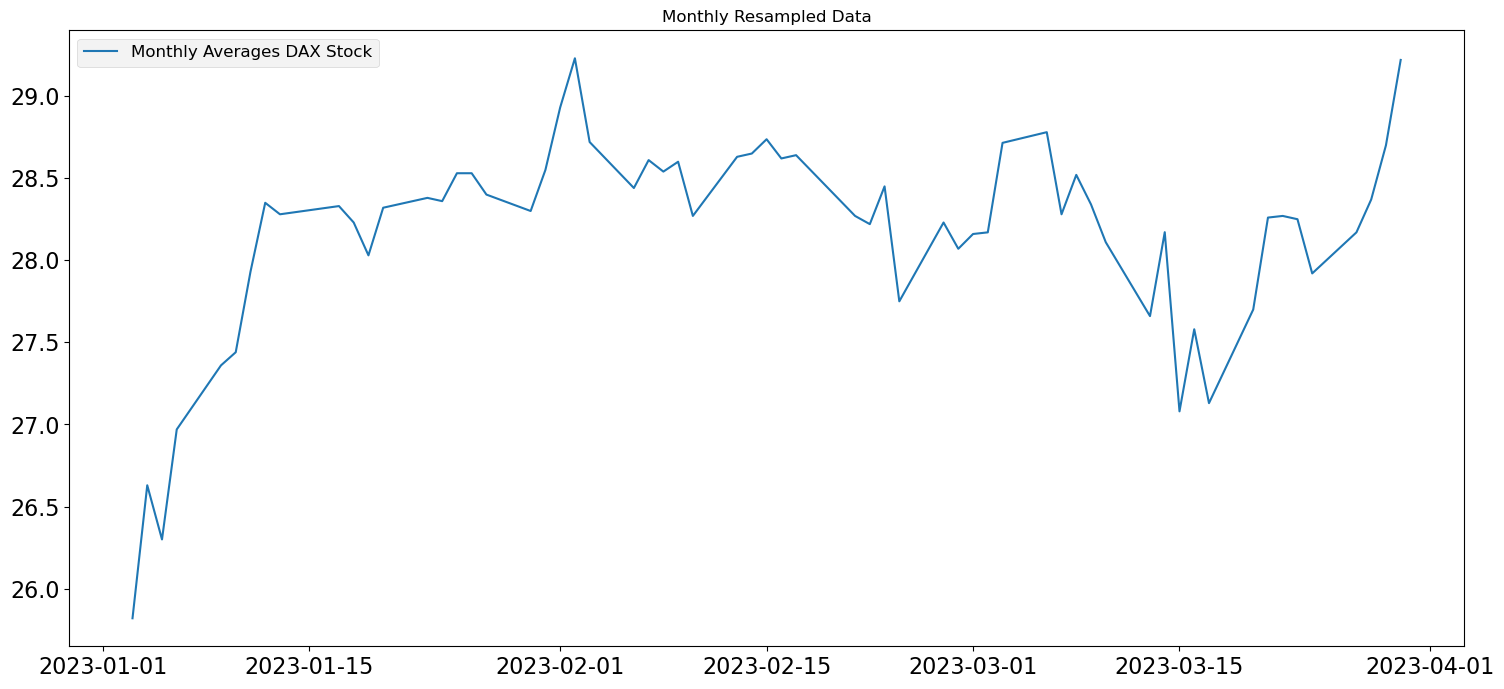

In [36]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(data['Adj Close'],label='Monthly Averages DAX Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()